In [1]:
# Reference: https://www.degeneratestate.org/posts/2018/Mar/24/causal-inference-with-python-part-1-potential-outcomes/
# for personal study purposes only

In [3]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datagenerators as dg

In [4]:
df0 = dg.generate_dataset_0()
df0.head()

,x,y
0,1,0
1,1,0
2,0,1
3,1,0
4,0,0


In [6]:
def estimate_uplift(ds):
    base = ds[ds.x==0]
    variant = ds[ds.x==1]

    delta = variant.y.mean() - base.y.mean()
    delta_err = 1.96 * np.sqrt(
        variant.y.var() / variant.shape[0] + base.y.var() / base.shape[0]
    )
    return {
        'estimated_effect': delta,
        'standard_error': delta_err,
    }

estimate_uplift(df0)

{'estimated_effect': -0.07900337648621397,
 'standard_error': 0.0872641107192013}

In [12]:
from scipy.stats import chi2_contingency

temp = (
    df0
    .assign(placeholder=1)
    .pivot_table(index='x', columns='y', values='placeholder', aggfunc='sum')
)

display(temp)


_, p, _, _ = chi2_contingency(temp, lambda_='log-likelihood')

print(p)


y,0,1
x,,
0,124,123
1,147,106


0.09224468128112676


In [13]:
df0_with_confounder = dg.generate_dataset_0(show_z=True)
df0_with_confounder.head()

,x,y,z
0,1,0,0
1,1,0,0
2,0,1,1
3,0,0,0
4,1,1,1


In [15]:
estimate_uplift(df0_with_confounder.loc[lambda df: df.z==0]), estimate_uplift(df0_with_confounder.loc[lambda df: df.z==1])


({'estimated_effect': 0.3364062752709041,
  'standard_error': 0.11921100786241492},
 {'estimated_effect': 0.125, 'standard_error': 0.20481231010269163})

<Axes: xlabel='z', ylabel='y'>

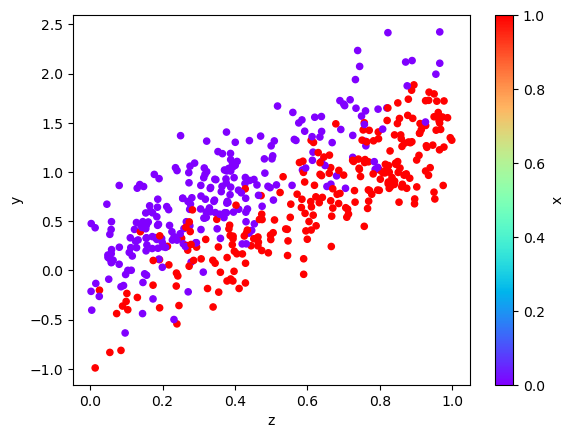

In [17]:
df1 = dg.generate_dataset_1()

df1.plot.scatter(x='z', y='y', c='x', cmap='rainbow')

In [20]:
from causalinference import CausalModel

In [23]:
cm = CausalModel(
    Y=df1.y.values,
    D=df1.x.values,
    X=df1.z.values,
)
cm.est_via_ols(adj=1)
print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE     -0.557      0.031    -17.746      0.000     -0.618     -0.495



/Users/kai/anaconda3/lib/python3.10/site-packages/causalinference/estimators/ols.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  olscoef = np.linalg.lstsq(Z, Y)[0]
